<h1><center>Eda on Diamond price</center></h1>

# Data Collection
1. Data is collected from <a href="https://www.kaggle.com/datasets/shivam2503/diamonds">kaggle link</a>
2. Data is in the form of .csv file


# Columns info 
##### A data frame with `53940 rows` and `10 variables`:
1. `price` price in US dollars (\$326--\$18,823)

2. `carat` weight of the diamond (0.2--5.01)

3. `cut` quality of the cut (Fair, Good, Very Good, Premium, Ideal)

4. `color` diamond colour, from J (worst) to D (best)

5. `clarity` a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

6. `x` length in mm (0--10.74)

7. `y` width in mm (0--58.9)

8. `z` depth in mm (0--31.8)

9. `depth` total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

10. `table` width of top of diamond relative to widest point (43--95)

# Defining the problem statement:
1. Create a ML model which can predict the price of a diamond
2. Target Variable: `price`
3. Predictors: `color`, `cut`, `carat`, `clarity`, `x`, `y`, `z`, `depth`, `table`

# Type of Machine Learning
- As the target variable is continous it is a `Supervised Machine Learning Regression Model`

# Dirty Data:
1. `depth` has 14 missing values
2. `x` has 7 missing values
3. `y` has 6 missing values
4. `z` has 19 missing values
5. ``
6. ``
7. ``

# Messy Data: 
- No  Messy Data

# Importing Labraies

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
warnings.filterwarnings('ignore')

# Loding data using pandas 

In [2]:
diamond =  pd.read_csv("/Users/harshwardhanjadhav/Desktop/Data Science/Projects/Linear Regression/artifact/08_28_2023_11_00_32/data_ingestion/feature_store/DiamondPricesData.csv")

### Making copy of dataframe

In [3]:
df = diamond

# Basic Data Info

### First 5 rows

In [4]:
df.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


### Last 5 rows 

In [5]:
df.tail()

,price,carat,cut,color,clarity,depth,table,x,y,z
53935,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74
53939,2757,0.75,Ideal,D,SI2,62.2,55.0,5.83,5.87,3.64


### Random Five samples

In [6]:
df.sample(5)

,price,carat,cut,color,clarity,depth,table,x,y,z
30869,743,0.33,Premium,G,VS2,62.1,56.0,4.44,4.41,2.75
53277,2649,0.71,Good,G,VS2,58.9,61.0,5.81,5.84,3.43
6270,4013,1.04,Premium,F,SI2,62.8,60.0,6.41,6.38,4.01
16699,421,0.30,Good,H,SI1,63.7,56.0,4.20,4.22,2.68
29507,702,0.32,Ideal,E,VS2,62.7,55.0,4.36,4.38,2.74


### Shape of data

In [7]:
df.shape

(53940, 10)

### Info Of data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53934 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53926 non-null  float64
 6   table    53940 non-null  float64
 7   x        53932 non-null  float64
 8   y        53933 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Checking Duplicates

In [9]:
df.duplicated().sum()

146

### Removing Duplicates

In [10]:
df.drop_duplicates(inplace=True)

### Shape after removing Duplicates

In [11]:
df.shape

(53794, 10)

### Checking Null values

In [12]:
df.isnull().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           7
y           6
z          19
dtype: int64

### Removing Null Values

In [13]:
df.dropna(inplace=True)

### Shape after removing Null Values

In [14]:
df.shape

(53755, 10)

### Checking Null values after dropping

In [15]:
df.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

### Describe data

In [16]:
df.describe()

,price,carat,depth,table,x,y,z
count,53755.000000,53755.000000,53755.000000,53755.000000,53755.000000,53755.000000,53755.000000
mean,3931.914278,0.797615,61.748388,57.457390,5.731760,5.735087,3.540085
std,3986.443692,0.473219,1.429430,2.232691,1.118656,1.139508,0.702052
min,326.000000,0.200000,43.000000,43.000000,3.730000,3.680000,1.070000
25%,951.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5326.500000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,18823.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


### Unique in data

In [17]:
df.nunique()

price      11595
carat        273
cut            5
color          7
clarity        8
depth        184
table        127
x            553
y            550
z            374
dtype: int64

# Data is Cleaned 

 <hr>

# <center>Visual Exploratory Data Analysis</center>
1. Categorical variable : Bar Plot
2. Numerical variable : Histogram

# Extracting Categorical And Numerical Features

In [18]:
df['cut'].dtype

dtype('O')

In [19]:
cat_feature = [ features for features in df.columns if df[features].dtype == "O"]
numeric_feature = [ features for features in df.columns if df[features].dtype != "O"]
numeric_feature,cat_feature

(['price', 'carat', 'depth', 'table', 'x', 'y', 'z'],
 ['cut', 'color', 'clarity'])

# Numeric Feature
1. `price`
2. `carat`
3. `depth`
4. `table`
5. `x`
6. `y`
7. `z`

# Categorical Features
1. `cut`
2. `color`
3. `clarity`

# Analysis on Categorical Features

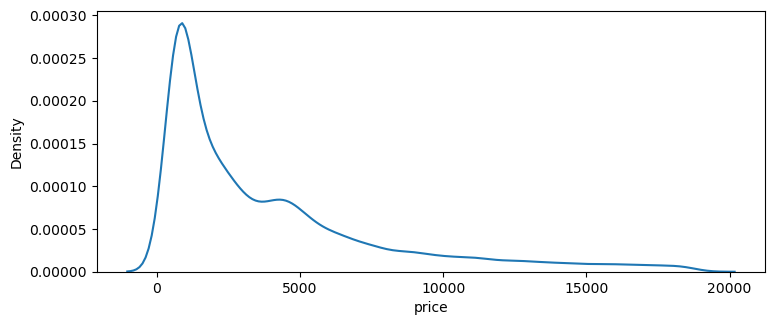

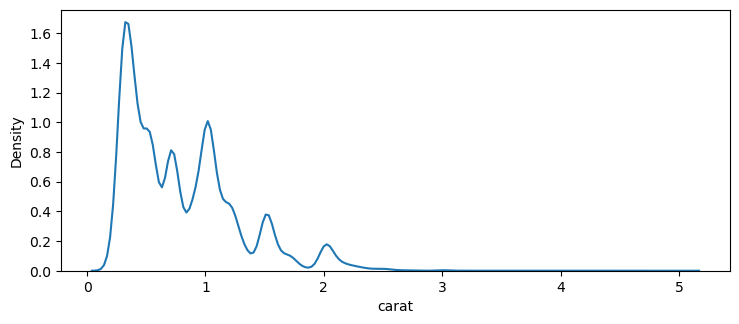

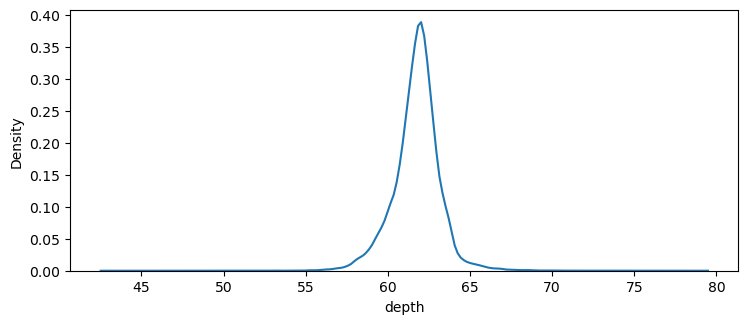

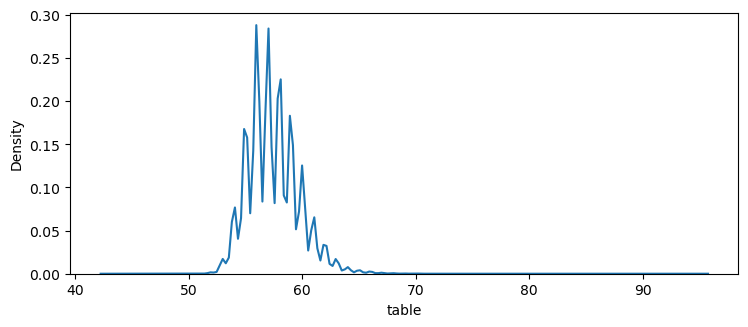

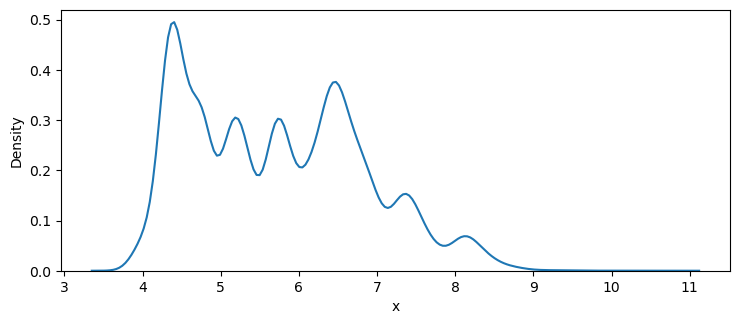

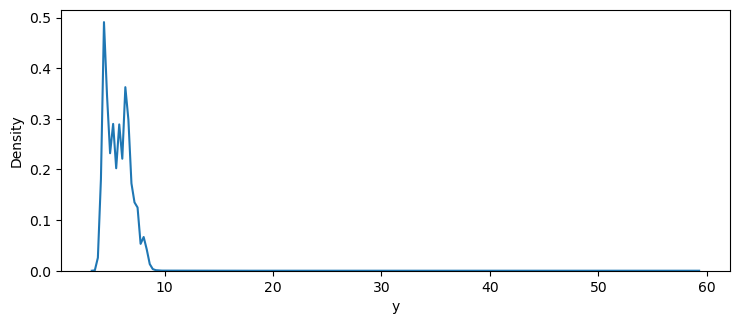

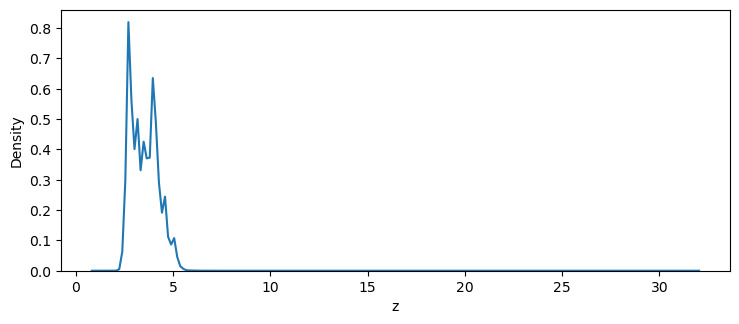

In [20]:
for i in range(0,len(numeric_feature)):
    plt.figure(figsize=(50,40))
    plt.subplot(10,5,i+1)
    sns.kdeplot(df[numeric_feature[i]])
    plt.show()
    

# Barplots

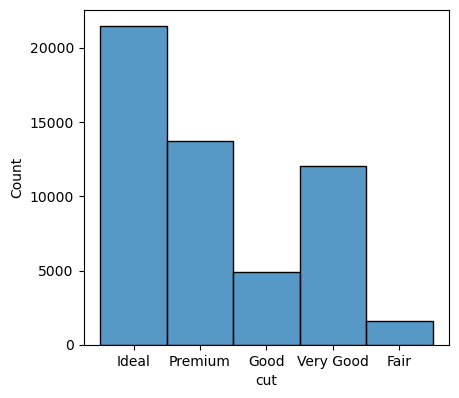

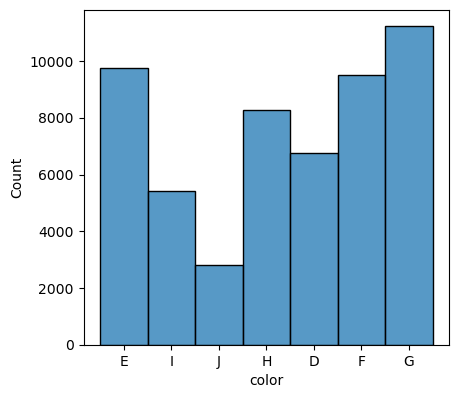

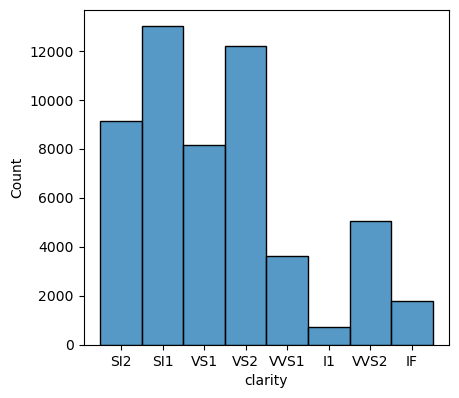

In [21]:
for i in range(0,len(cat_feature)):
    plt.figure(figsize=(50,20))
    plt.subplot(4,9,i+1)
    sns.histplot(df[cat_feature[i]])
    plt.show()

# Checking Outliers 

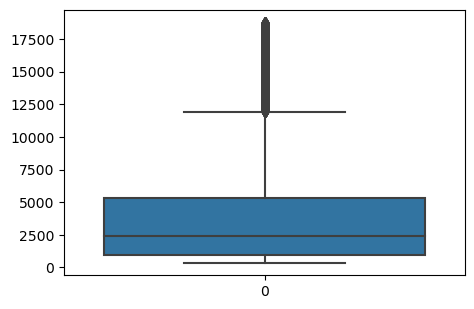

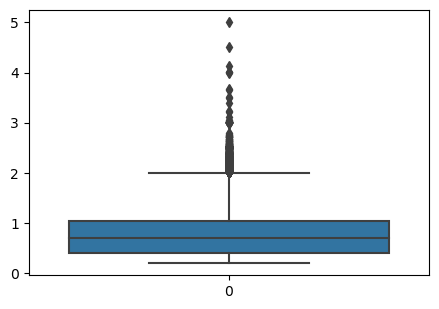

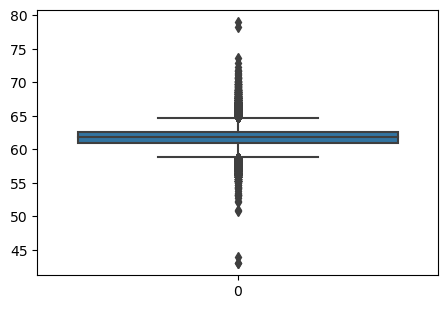

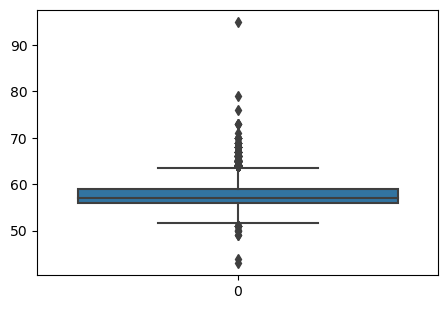

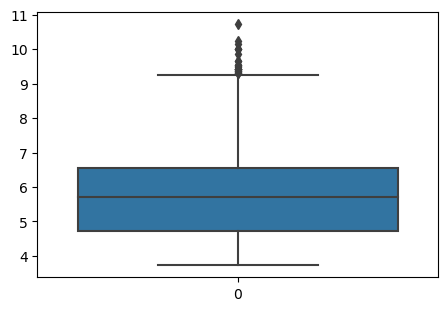

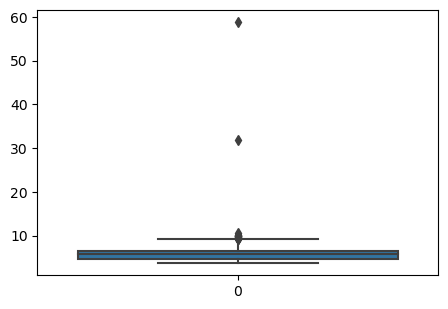

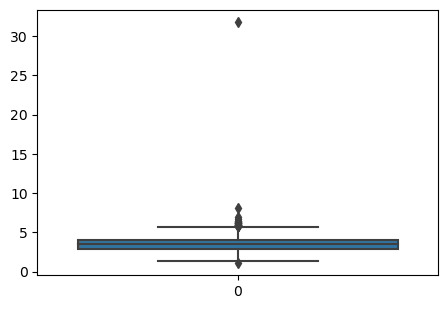

In [22]:
for i in range(0,len(numeric_feature)):
    plt.figure(figsize=(30,20))
    plt.subplot(5,5,i+1)
    sns.boxplot(df[numeric_feature[i]])

    plt.show()

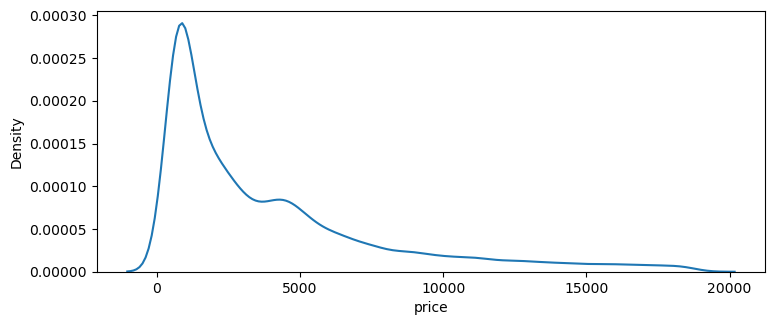

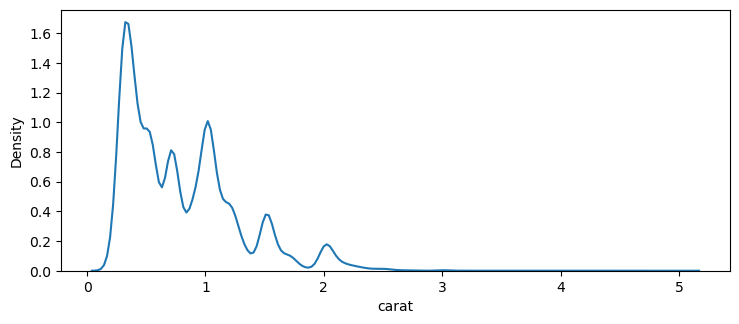

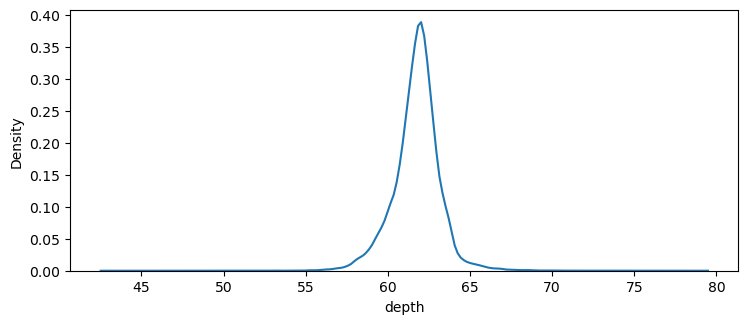

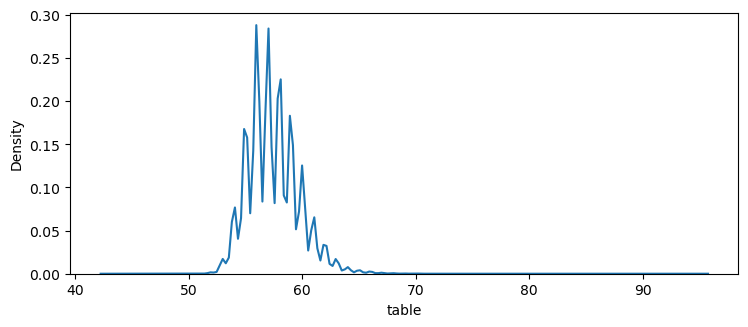

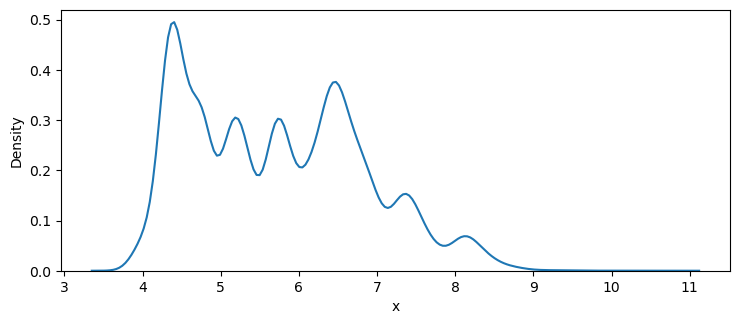

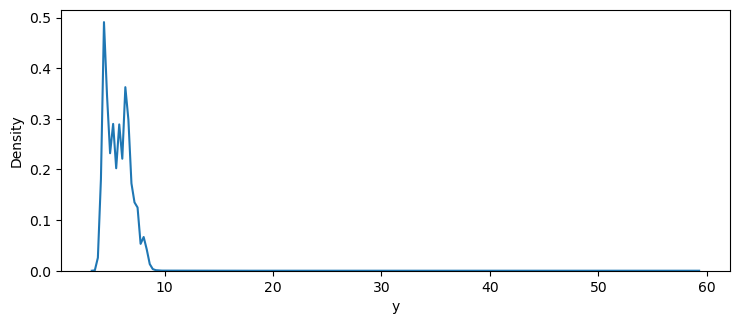

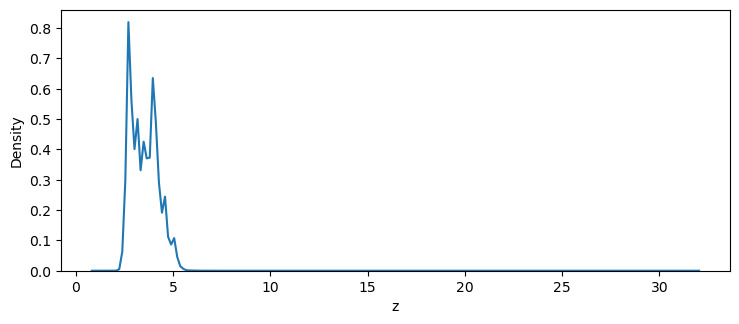

In [23]:
for i in range(0,len(numeric_feature)):
    plt.figure(figsize=(50,40))
    plt.subplot(10,5,i+1)
    sns.kdeplot(df[numeric_feature[i]])
    plt.show()

# Checking total number of outilers

In [24]:
def count_outliers_iqr(data, multiplier=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    total = data[(data < lower_bound) | (data > upper_bound)].count()
   
    return total,lower_bound,upper_bound

In [25]:
for i in numeric_feature:
    outlier_count,lower_bound,upper_bound = count_outliers_iqr(df[i])
    print(f" | Outliers {i} : {outlier_count} \n | Lower bound: {lower_bound} \n | Upper bound: {upper_bound}")
    print("-----------------------------------")


 | Outliers price : 3515 
 | Lower bound: -5612.25 
 | Upper bound: 11889.75
-----------------------------------
 | Outliers carat : 1867 
 | Lower bound: -0.5599999999999999 
 | Upper bound: 2.0
-----------------------------------
 | Outliers depth : 2522 
 | Lower bound: 58.75 
 | Upper bound: 64.75
-----------------------------------
 | Outliers table : 602 
 | Lower bound: 51.5 
 | Upper bound: 63.5
-----------------------------------
 | Outliers x : 24 
 | Lower bound: 1.9649999999999999 
 | Upper bound: 9.285
-----------------------------------
 | Outliers y : 22 
 | Lower bound: 1.9899999999999993 
 | Upper bound: 9.27
-----------------------------------
 | Outliers z : 27 
 | Lower bound: 1.2150000000000003 
 | Upper bound: 5.734999999999999
-----------------------------------


# Removing outliers

In [26]:
df.loc[df['carat'] < -0.5599999999999999 ,'carat'] = -0.6
df.loc[df['carat'] >2.0,'carat'] = 2.0

df.loc[df['depth'] < 58.75  ,'depth'] = 58.75 
df.loc[df['depth'] > 64.75,'depth'] = 64.75

df.loc[df['x'] < 1.2150000000000003,'x'] = 1.2
df.loc[df['x'] > 9.285,'x'] = 9.285

df.loc[df['y'] < 1.9899999999999993 ,'y'] = 2
df.loc[df['y'] > 9.27,'y'] = 9.27

df.loc[df['z'] < 1.2150000000000003 ,'z'] = 1.215
df.loc[df['z'] > 5.734999999999999,'z'] = 5.73

df.loc[df['table'] <  51.5,'table'] = 51.5
df.loc[df['table'] > 63.5,'table'] = 63.5



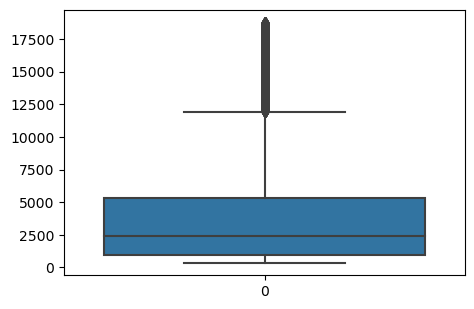

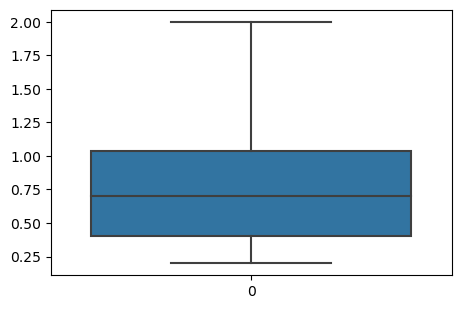

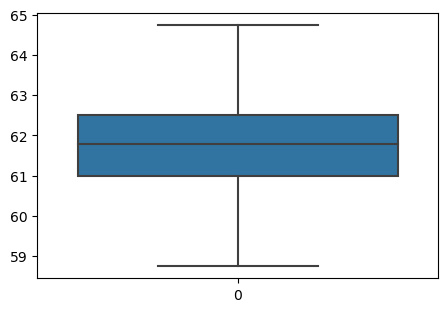

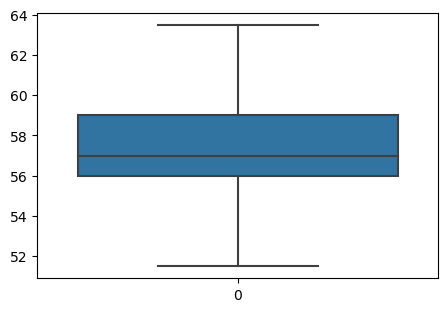

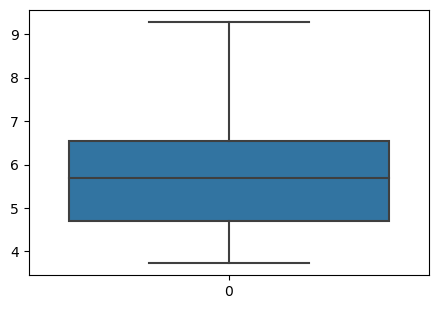

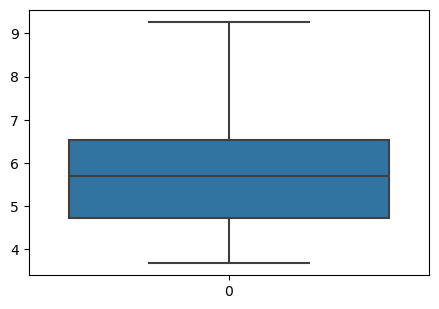

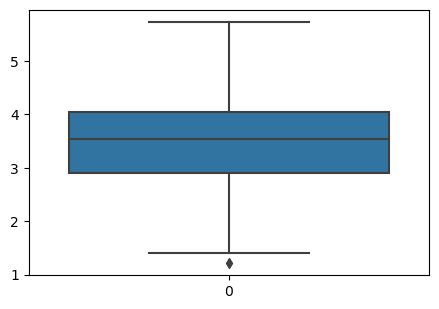

In [27]:
for i in range(0,len(numeric_feature)):
    plt.figure(figsize=(30,20))
    plt.subplot(5,5,i+1)
    sns.boxplot(df[numeric_feature[i]])

    plt.show()

<Axes: >

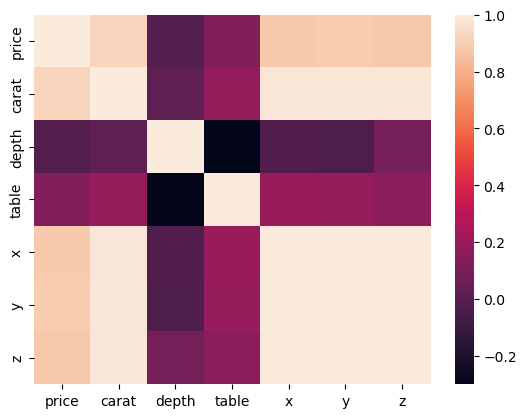

In [28]:
sns.heatmap(df.corr())

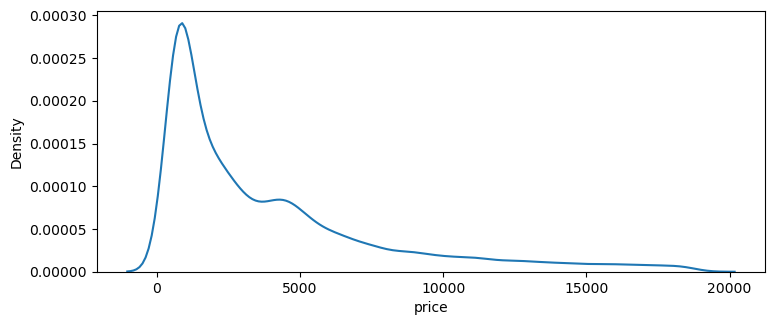

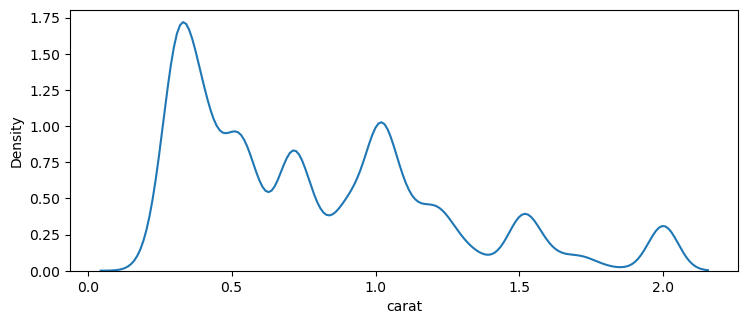

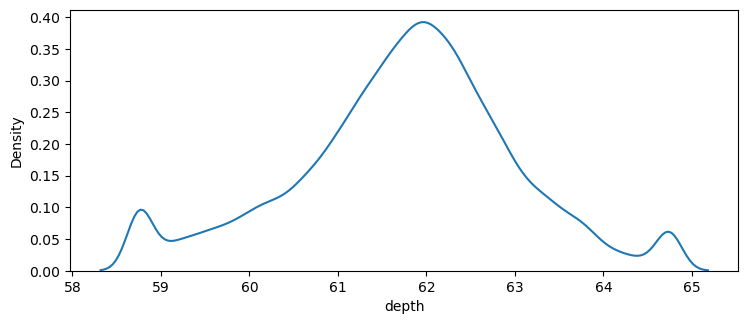

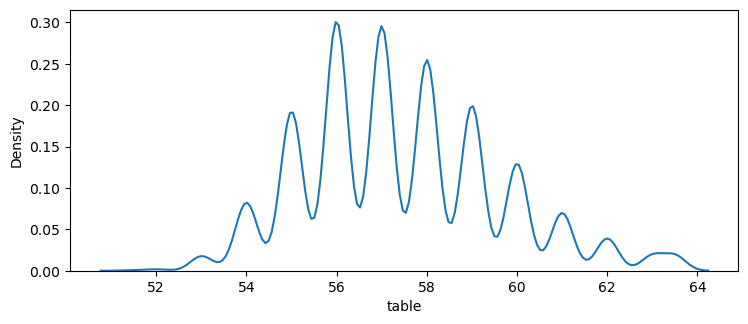

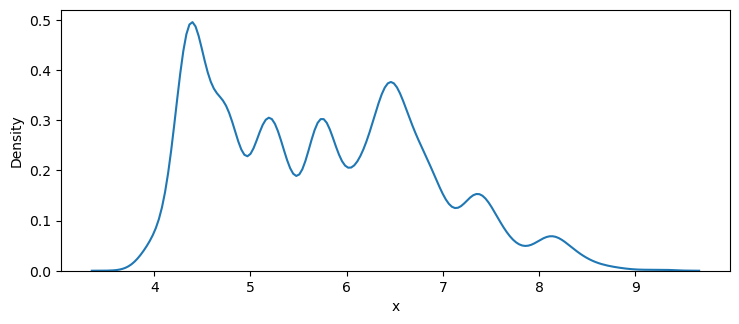

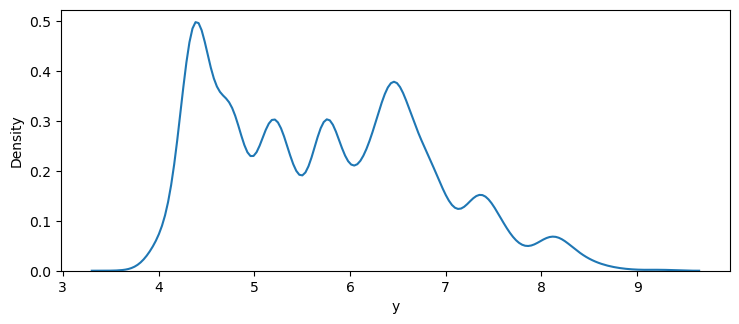

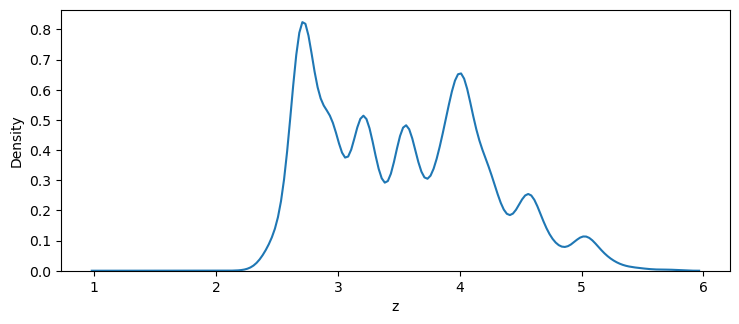

In [29]:
for i in range(0,len(numeric_feature)):
    plt.figure(figsize=(50,40))
    plt.subplot(10,5,i+1)
    sns.kdeplot(df[numeric_feature[i]])
    plt.show()

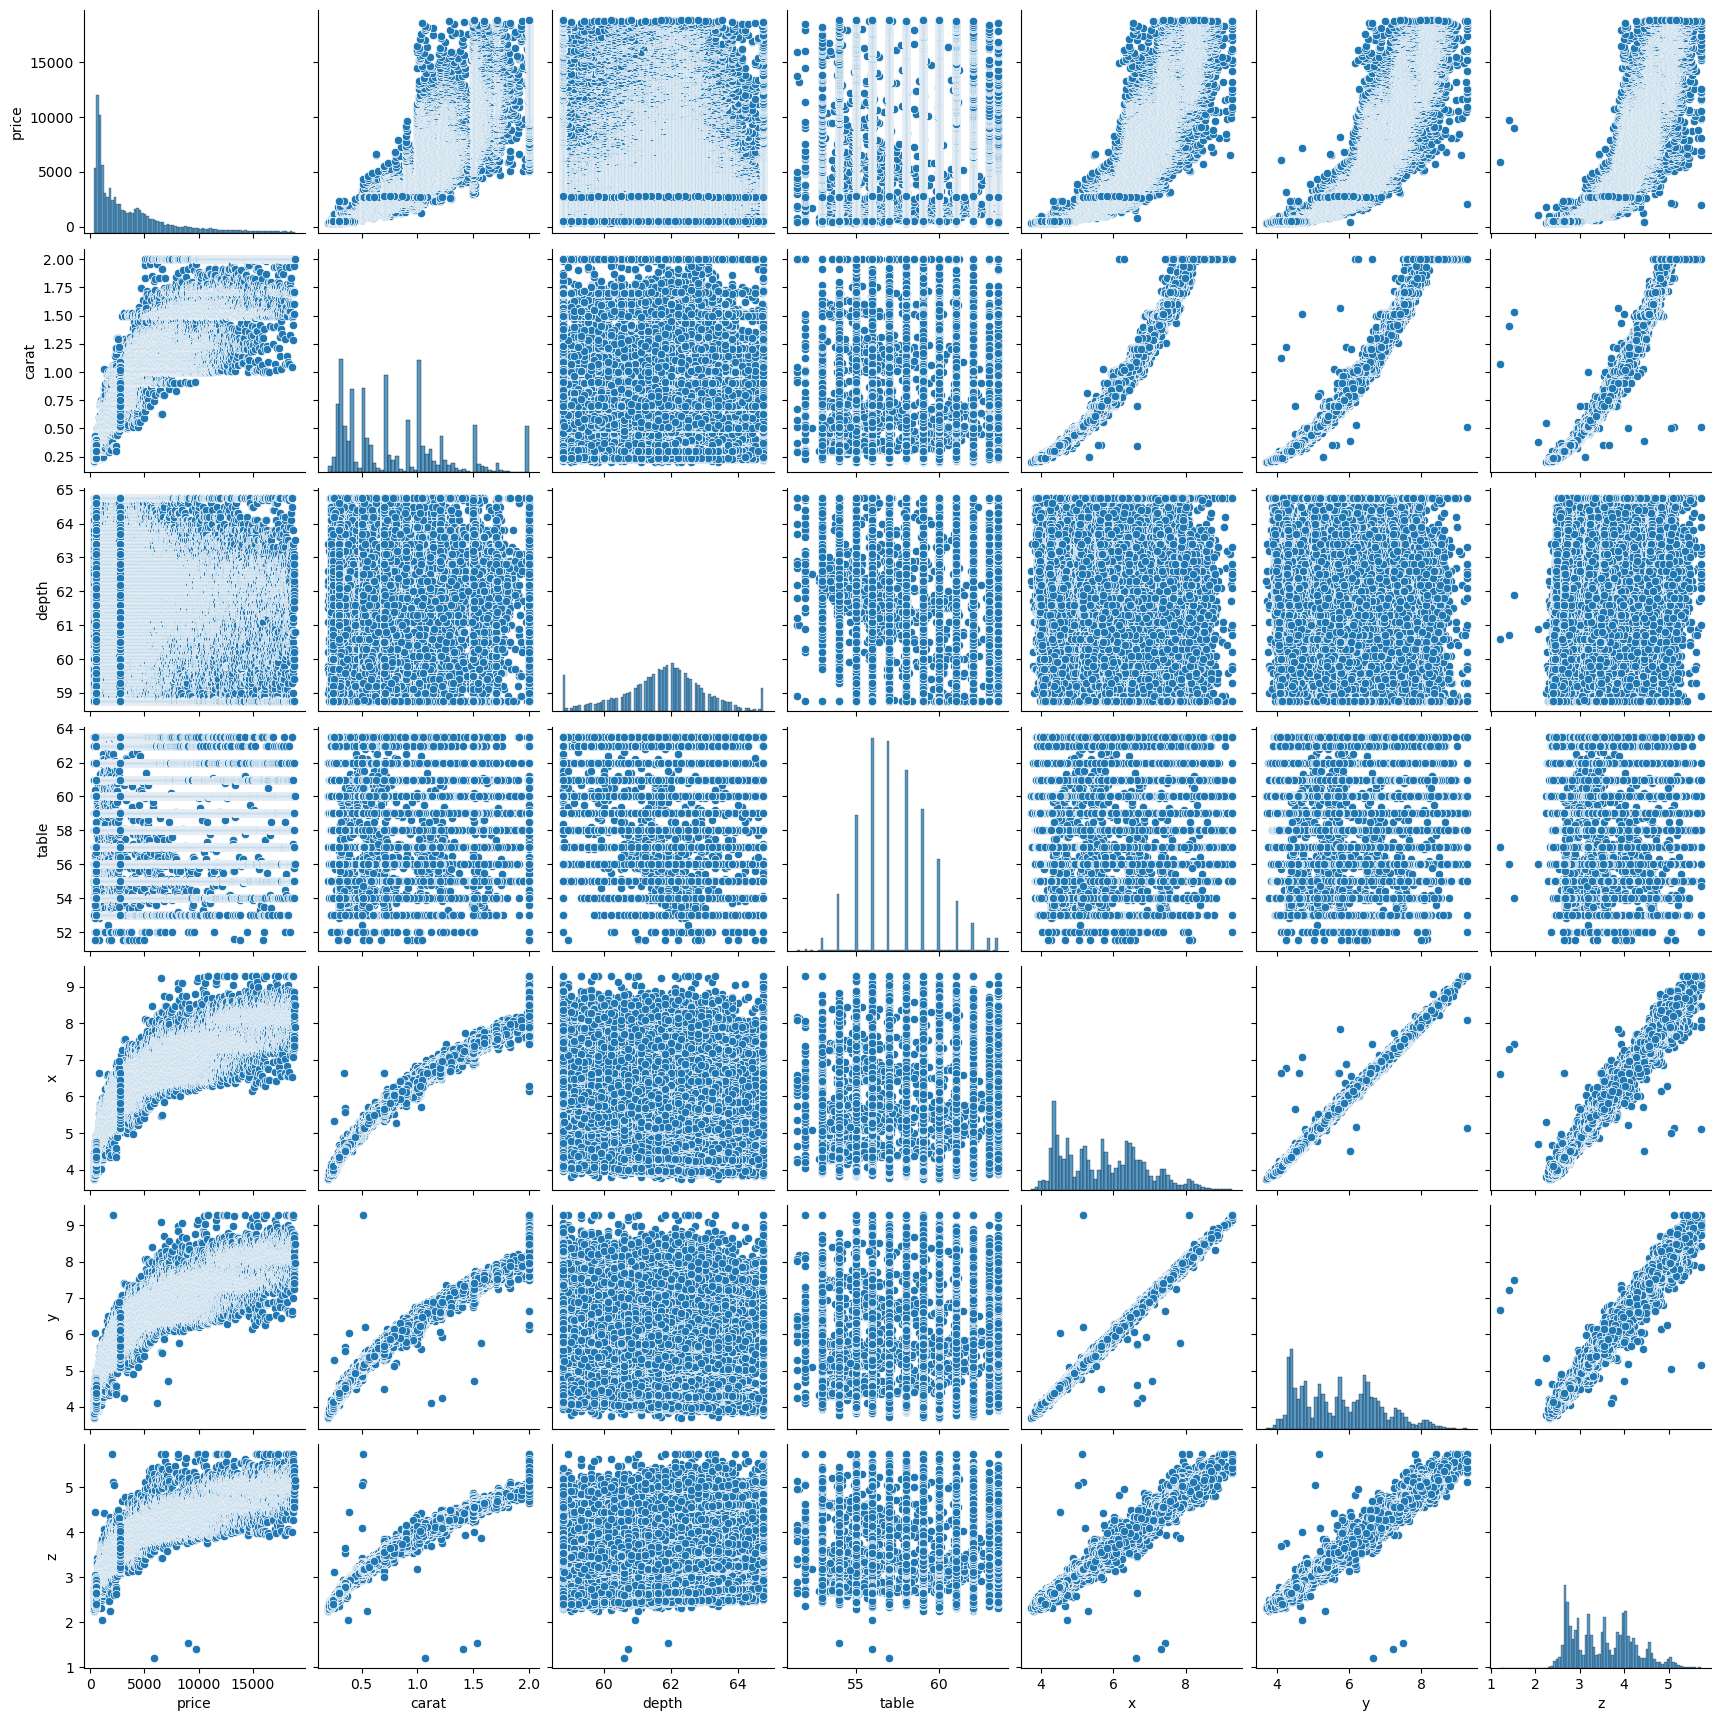

In [30]:
sns.pairplot(df)

# Feature Selection (Continuous Vs Continuous) using Correlation value

In [31]:
continous_corr = df.corr()
continous_corr

,price,carat,depth,table,x,y,z
price,1.000000,0.922516,-0.013112,0.129965,0.887166,0.888633,0.881908
carat,0.922516,1.000000,0.021579,0.186932,0.983228,0.982355,0.981550
depth,-0.013112,0.021579,1.000000,-0.299835,-0.028884,-0.031587,0.089688
table,0.129965,0.186932,-0.299835,1.000000,0.198069,0.192132,0.158325
x,0.887166,0.983228,-0.028884,0.198069,1.000000,0.998515,0.990942
y,0.888633,0.982355,-0.031587,0.192132,0.998515,1.000000,0.990677
z,0.881908,0.981550,0.089688,0.158325,0.990942,0.990677,1.000000


In [57]:
continous_corr['price'][abs(continous_corr['price']) > 0.60 ]


price    1.000000
carat    0.922516
x        0.887166
y        0.888633
z        0.881908
Name: price, dtype: float64

# Final selected Continuous columns:

'carat', 'x','y','z'



# Relationship exploration: Categorical Vs Continuous -- Box Plots

In [33]:
df

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.50,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.80,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,58.75,63.5,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.40,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.30,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,SI1,60.80,57.0,5.75,5.76,3.50
53936,2757,0.72,Good,D,SI1,63.10,55.0,5.69,5.75,3.61
53937,2757,0.70,Very Good,D,SI1,62.80,60.0,5.66,5.68,3.56
53938,2757,0.86,Premium,H,SI2,61.00,58.0,6.15,6.12,3.74


<Axes: xlabel='color', ylabel='price'>

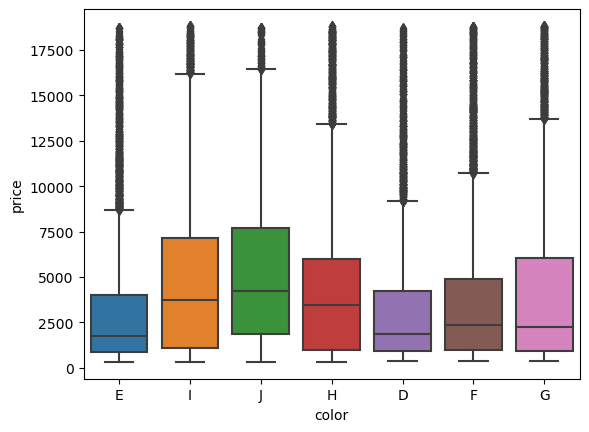

In [34]:
sns.boxplot(x='color',y='price',data= df)

<Axes: xlabel='cut', ylabel='price'>

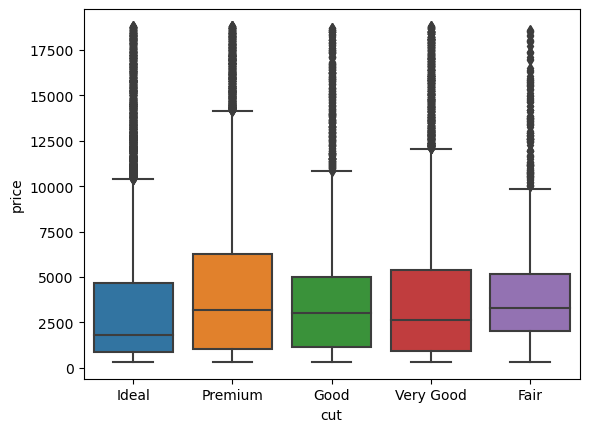

In [35]:
sns.boxplot(x='cut',y='price',data= df)

<Axes: xlabel='clarity', ylabel='price'>

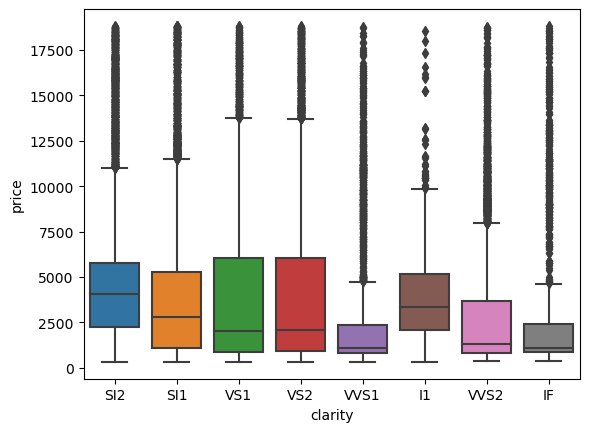

In [36]:
sns.boxplot(x='clarity',y='price',data= df)

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [41]:
from scipy.stats import f_oneway

def annova_test(data,predicators,TargetVariable):
    SelectedPredictors = []

    for cat in predicators:
        cat_goupby_list = data.groupby(cat)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*cat_goupby_list)

        if AnovaResults[1] < 0.5:
            print(cat, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(cat)

        else:
            print(cat, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return SelectedPredictors

In [42]:
target_col ='price'
predicators_col = ['clarity','cut','color']

annova_test(data=df,
            predicators=predicators_col,
            TargetVariable=target_col
           )

clarity is correlated with price | P-Value: 2.49454378878e-312
cut is correlated with price | P-Value: 1.367746133096392e-146
color is correlated with price | P-Value: 0.0


['clarity', 'cut', 'color']

# Final selected Categorical columns:

'cut', 'color', 'clarity'



<hr>

# Selecting final predictors for Machine Learning


In [47]:
final_col = ['clarity', 'cut', 'color','carat', 'x','y','z']

In [49]:
diamond_df = df[final_col]

In [50]:
diamond_df

,clarity,cut,color,carat,x,y,z
0,SI2,Ideal,E,0.23,3.95,3.98,2.43
1,SI1,Premium,E,0.21,3.89,3.84,2.31
2,VS1,Good,E,0.23,4.05,4.07,2.31
3,VS2,Premium,I,0.29,4.20,4.23,2.63
4,SI2,Good,J,0.31,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,SI1,Ideal,D,0.72,5.75,5.76,3.50
53936,SI1,Good,D,0.72,5.69,5.75,3.61
53937,SI1,Very Good,D,0.70,5.66,5.68,3.56
53938,SI2,Premium,H,0.86,6.15,6.12,3.74


In [51]:
diamond_df.to_csv('diamond_cleaned.csv')

# Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning

1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In [52]:
diamond_df['cut'].replace({'Good':1, 
                          'Very Good':2,
                          'Fair':3,
                          'Ideal':4,
                          'Premium':5
                         }, inplace=True)

In [53]:
diamond_df['color'].replace({'J':1, 
                          'I':2,
                          'H':3,
                          'G':4,
                          'F':5,
                          'E':6,
                          'D':7
                         }, inplace=True)

In [54]:
diamond_df['clarity'].replace({'I1':1,
                          'SI1':2,
                          'SI2':3,
                          'VS1':4,
                          'VS2':5,
                          'VVS1':6,
                          'VVS2':7,
                          'IF':8
                         }, inplace=True)

In [55]:
diamond_df

,clarity,cut,color,carat,x,y,z
0,3,4,6,0.23,3.95,3.98,2.43
1,2,5,6,0.21,3.89,3.84,2.31
2,4,1,6,0.23,4.05,4.07,2.31
3,5,5,2,0.29,4.20,4.23,2.63
4,3,1,1,0.31,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,2,4,7,0.72,5.75,5.76,3.50
53936,2,1,7,0.72,5.69,5.75,3.61
53937,2,2,7,0.70,5.66,5.68,3.56
53938,3,5,3,0.86,6.15,6.12,3.74
